# Proyek Analisis Data: Bike Sharing dataset
- Nama: Monica Elisabeth Mamondol
- Email: bethlisa125@gmail.com
- Id Dicoding: monica_mamondol

## Menentukan Pertanyaan Bisnis

- Apakah ada tren kenaikan atau penurunan penyewaan sepeda selama musim tertentu?
- Bagaimana hubungan antara cuaca (weathersit) dan jumlah penyewaan sepeda?
- Di tahun dan di bulan apa penyewa sepeda yang paling banyak dan paling sedikit tersewa?
- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja (working day) dan hari libur (holiday)?
- Apakah terdapat hari-hari tertentu dalam seminggu yang memiliki penyewaan sepeda lebih tinggi?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

**BACKGROUND**

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian
kembali telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya
kembali ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari
lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam lalu lintas,
masalah lingkungan dan kesehatan.

Terlepas dari penerapan dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh
sistem ini membuatnya menarik untuk diteliti. Dibandingkan dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi
perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi
jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.



### Gathering Data

Pada tahap ini, saya memilih dataset dengan judul BIKE SHARING DATASET. Pada proyek ini data yang akan digunakan terdiri dari 2 tabel, yaitu tabel Day dan tabel Hour. Di bawah ini saya menyajikan kedua tabel tersebut sebagai berikut:



In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Tabel di atas merupakan tabel pertama yang saya muat dengan 5 baris pertama dari DataFrame day_df.

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


sedangkan untuk tabel yang kedua saya muat dengan menamilkan 5 baris pertama dari DataFrame hour_df.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari pengamatan saya pada tabel day dengan DataFrame day_df di atas, saya menyimpulkan bahwa tidak ada yang missing value.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Untuk memastikan bahwa tidak ada data yang missing value saya menjalankan kode day_df.isna().sum() dan hasilnya seperti gambar di atas.

Selanjutnya saya akan memeriksa apakah ada data yang duplikat atau tidak pada tabel day, dan hasilnya seperti di bawah ini.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Ketika menjalankan kode di atas, saya tidak menemukan data yang duplikat.

Selanjutnya saya akan memeriksa parameter statistik dari kolom numerik yang terdapat dalam DataFrame day_df. Untuk lebih memudahkan pemeriksaan, saya akan menggunakan metode describe() seperti di bawah ini.

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasil pengamatan saya pada data parameter statistik kolom numerik tidak terdapat keanehan.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sedangkan untuk tabel hour dengan DataFrame hour_df, saya juga menyimpulkan bahwa tidak ada data yang missing value

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Untuk memastikan bahwa tidak ada data yang missing value saya menjalankan kode hour_df.isna().sum() dan hasilnya seperti gambar di atas.

Selanjutnya saya akan memeriksa apakah ada data yang duplikat atau tidak pada tabel hour, dan hasilnya seperti di bawah ini.

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Ketika menjalankan kode di atas, saya tidak menemukan data yang duplikat.

Selanjutnya saya akan memeriksa parameter statistik dari kolom numerik yang terdapat dalam DataFrame hour_df. Untuk lebih memudahkan pemeriksaan, saya akan menggunakan metode describe() seperti di bawah ini.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil pengamatan saya pada data parameter statistik kolom numerik tidak terdapat keanehan.

### Cleaning Data

**MENGHILANGKAN DUPLICATE DATA**



Proses selanjutnya yang saya lakukan adalah pembersihan data sebagai berikut. Pertama-tama pada tabel day DataFrame day_df kemudian tabel hour DataFrame hour_df.

In [12]:
day_df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Untuk memastikan tidak ada data yang terduplikasi saya menggunakan kode untuk menghapus data yang duplikat jika ada. Dan hasilnya sesuai yang ditampilkan di atas dan hasilnya tidak ada duplikat.

Selanjutnya pembersihan pada data tabel hour DataFrame hour_df.  

In [14]:
hour_df.drop_duplicates(inplace=True)

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Untuk memastikan tidak ada data yang terduplikasi saya menggunakan kode untuk menghapus data yang duplikat jika ada. Dan hasilnya sesuai yang ditampilkan di atas dan hasilnya tidak ada duplikat.

**MENANGANI MISSING VALUE**

Untuk mengidentifikasi missing value pada tabel day DataFrame day_df, saya akan menjalankan kode di bawah ini.



In [16]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

hasil tabel di atas menunjukkan bahwa proses pembersihan missing value tersebut berhasil.

Selanjutnya pembersihan pada data tabel hour DataFrame hour_df.

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

hasil tabel di atas menunjukkan bahwa proses pembersihan missing value tersebut berhasil.

**MENANGANI INACCURATE VALUE**

Untuk memastikan tidak terdapat inaccurate value pada tabel day DataFrame day_df, saya akan menjalankan kode di bawah ini.

In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil tersebut bahwa tiap kolom memiliki nilai maksimum yang masuk akal.

Selanjutnya pembersihan pada data tabel hour DataFrame hour_df.

In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil tersebut bahwa tiap kolom memiliki nilai maksimum yang masuk akal.

## Exploratory Data Analysis (EDA)

### Explore ...

**EKSPLORASI DATA Day_df**

Saya akan mengeksplorasi data day_df terlebih dahulu. Dataset ini memuat berbagai informasi terkait day, instant, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, winspeed, casual, registered, cnt.
Sebagai permulaan, saya akan memuat rangkuman parameter statistik dari data day_df menggunakan method describe()

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan rangkuman parameter statistik di atas, saya memperoleh sejumlah informasi jumlah rata-rata penyewa casual adalah sekitar 848.18, sementara penyewa terdaftar rata-rata adalah sekitar 3656.17. Jumlah penyewa terdaftar jauh lebih tinggi, menunjukkan dominasi pengguna terdaftar dalam dataset ini.

In [21]:
pivot_table = day_df.pivot_table(index='season',
                             values=['casual', 'registered'],
                             aggfunc={'casual': 'sum', 'registered': 'sum'})
print(pivot_table)

        casual  registered
season                    
1        60622      410726
2       203522      715067
3       226091      835038
4       129782      711831


Berdasarkan pivot table di atas, dapat diketahui bahwa season (musim) dengan jumlah penyewa sepeda terbanyak di kategori registered yaitu 835.038 didominasi oleh season 3 (Fall).

In [22]:
pivot_table = day_df.pivot_table(index='mnth',
                             values=['casual', 'registered'],
                             aggfunc={'casual': 'sum', 'registered': 'sum'})
print(pivot_table)

      casual  registered
mnth                    
1      12042      122891
2      14963      136389
3      44444      184476
4      60802      208292
5      75285      256401
6      73906      272436
7      78157      266791
8      72039      279155
9      70323      275668
10     59760      262592
11     36603      218228
12     21693      189343


Berdasarkan pivot table di atas, dapat diketahui bahwa month (bulan) dengan jumlah penyewa sepeda terbanyak yaitu di bulan 5 (Mei), 6 (Juni), 7 (Juli), 8 (Agustus), 9 (September) di kategori casual.

In [23]:
pivot_table = day_df[day_df['yr'] == 0].pivot_table(index='yr',
                                           values=['casual', 'registered'],
                                           aggfunc={'casual': 'sum', 'registered': 'sum'})

print("Tahun 2011:")
print(pivot_table)

pivot_table_2012 = day_df[day_df['yr'] == 1].pivot_table(index='yr',
                                                 values=['casual', 'registered'],
                                                 aggfunc={'casual': 'sum', 'registered': 'sum'})

print("\nTahun 2012:")
print(pivot_table_2012)

Tahun 2011:
    casual  registered
yr                    
0   247252      995851

Tahun 2012:
    casual  registered
yr                    
1   372765     1676811


Berdasarkan pivot table di atas, dapat diketahui bahwa tahun dengan jumlah penyewa sepeda terbanyak yaitu di tahun 2012.

##### EKSPLORASI DATA Hour_df

Saya akan mengeksplorasi data hour_df terlebih dahulu. Dataset ini memuat berbagai informasi terkait hour, instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, winspeed, casual, registered, cnt. Sebagai permulaan, saya akan memuat rangkuman parameter statistik dari data hour_df menggunakan method describe()


In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan rangkuman parameter statistik di atas, saya memperoleh sejumlah informasi jumlah rata-rata penyewa casual adalah sekitar 35.68, sementara penyewa terdaftar rata-rata adalah sekitar 153.79. Jumlah penyewa terdaftar jauh lebih tinggi, menunjukkan dominasi pengguna terdaftar dalam dataset ini.

Saya akan membuat pivot table untuk melihat jam berapa jumlah pengguna penyewa sepeda paling banyak 

In [25]:
hourly_stats = hour_df.groupby('hr')[['cnt']].mean()
print(hourly_stats)

           cnt
hr            
0    53.898072
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
6    76.044138
7   212.064649
8   359.011004
9   219.309491
10  173.668501
11  208.143054
12  253.315934
13  253.661180
14  240.949246
15  251.233196
16  311.983562
17  461.452055
18  425.510989
19  311.523352
20  226.030220
21  172.314560
22  131.335165
23   87.831044


Berdasarkan pivot table di atas, terdapat jam-jam puncak di mana jumlah penyewa sepeda mencapai tingkat tertinggi. Penggunaan sepeda cenderung rendah di awal pagi (jam 0-4) dan meningkat secara signifikan ketika mencapai jam 5 pagi (05:00). Jam 6 pagi (06:00) memiliki variabilitas yang signifikan dalam penggunaan sepeda, mungkin karena banyak orang yang memulai aktivitasnya di pagi hari. Penggunaan sepeda mulai menurun setelah jam 6 sore (18:00) dan mencapai titik terendah pada jam 3 pagi (03:00).

Kita perlu membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari kedua tabel tersebut.

In [26]:
data_day = pd.read_csv('day.csv')  

data_hour = pd.read_csv('hour.csv')  

all_df = data_day.merge(data_hour, left_index=True, right_index=True)

print(all_df)

     instant_x    dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0            1  2011-01-01         1     0       1          0          6   
1            2  2011-01-02         1     0       1          0          0   
2            3  2011-01-03         1     0       1          0          1   
3            4  2011-01-04         1     0       1          0          2   
4            5  2011-01-05         1     0       1          0          3   
..         ...         ...       ...   ...     ...        ...        ...   
726        727  2012-12-27         1     1      12          0          4   
727        728  2012-12-28         1     1      12          0          5   
728        729  2012-12-29         1     1      12          0          6   
729        730  2012-12-30         1     1      12          0          0   
730        731  2012-12-31         1     1      12          0          1   

     workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0           

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah ada tren kenaikan atau penurunan penyewaan sepeda selama tahun 2011-2012?

Untuk menjawab pertanyaan pertama saya akan menganalisis tren kenaikan atau penurunan penyewaan sepeda dengan menggunakan line chart. Berikut adalah kode untuk membuat visualisasi tren kinerja selama tahun 2011-2012:

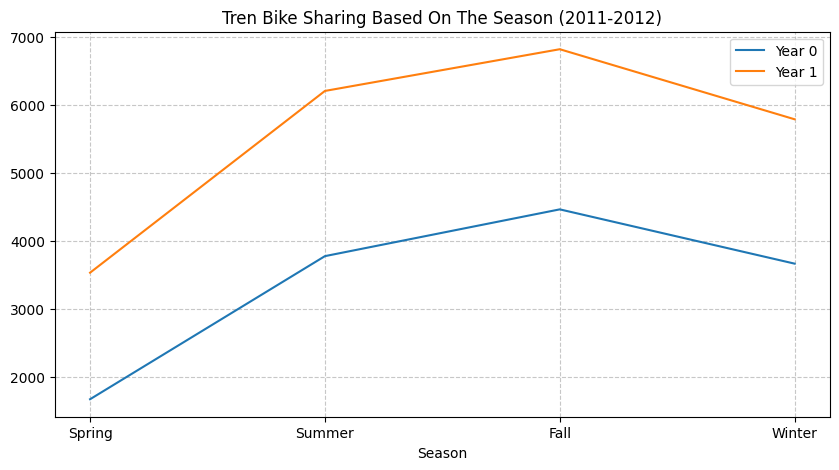

In [27]:
season_data = all_df[(all_df['yr_x'] == 0) | (all_df['yr_x'] == 1)].groupby(['yr_x', 'season_x'])['cnt_x'].mean().reset_index()

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_data['season_label'] = season_data['season_x'].map(season_labels)

plt.figure(figsize=(10, 5))
for year in [0, 1]:
    year_data = season_data[season_data['yr_x'] == year]
    plt.plot(year_data['season_label'], year_data['cnt_x'], label=f'Year {year}')

plt.title('Tren Bike Sharing Based On The Season (2011-2012)')
plt.xlabel('Season')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 2:

Bagaimana hubungan antara cuaca (weathersit) dan jumlah penyewaan sepeda?

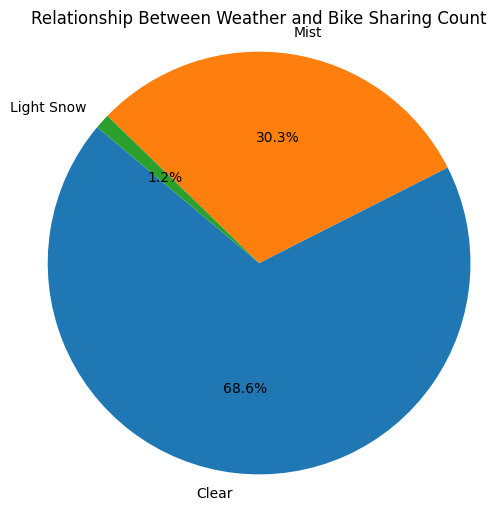

In [28]:
weather_data = all_df.groupby('weathersit_x')['cnt_x'].sum().reset_index()

weather_labels = ['Clear', 'Mist', 'Light Snow'] 

plt.figure(figsize=(6, 6))
plt.pie(weather_data['cnt_x'], labels=weather_labels, autopct='%1.1f%%', startangle=140)
plt.title('Relationship Between Weather and Bike Sharing Count')
plt.axis('equal') 

plt.show()

### Pertanyaan 3:

Di tahun dan di bulan apa penyewa sepeda yang paling banyak dan paling sedikit tersewa?

Untuk menganalisis di tahun dan di bulan apa penyewa sepeda yang paling banyak dan paling sedikit tersewa. Saya perlu membuat dua buah visualisasi data dalam satu gambar visual. Berikut adalah kode untuk menciptakan visualisasi ini:

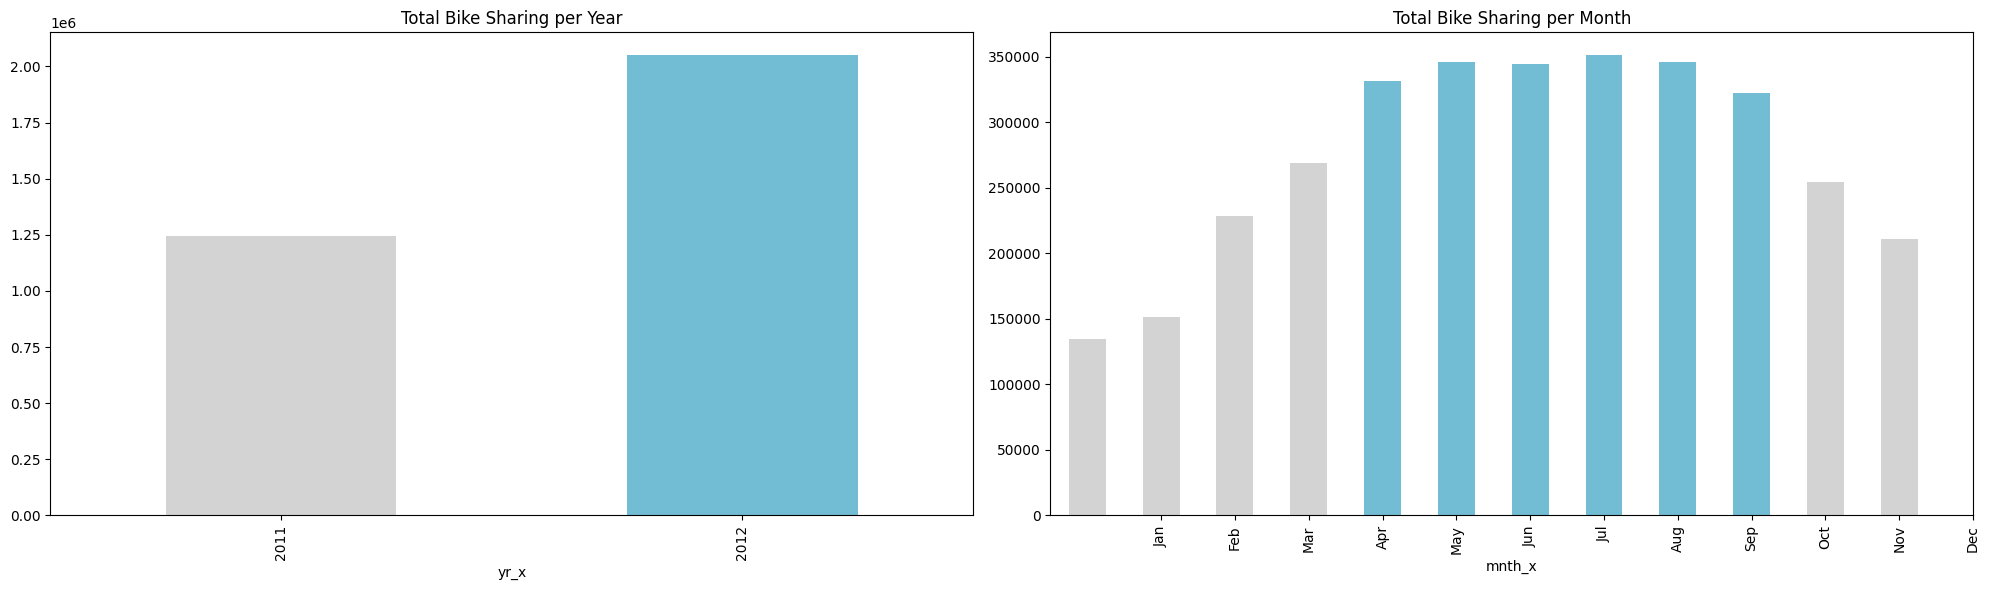

In [29]:
yearly_monthly_data = all_df.groupby(['yr_x', 'mnth_x'])['cnt_x'].sum().unstack()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
yearly_data = all_df.groupby('yr_x')['cnt_x'].sum()
yearly_data.plot(kind='bar', color= ["#D3D3D3", "#72BCD4"])
plt.title('Total Bike Sharing per Year')
plt.xticks(yearly_data.index, ['2011', '2012'])

plt.subplot(1, 2, 2)
monthly_data = all_df.groupby('mnth_x')['cnt_x'].sum()
monthly_data.plot(kind='bar', color= ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"])
plt.title('Total Bike Sharing per Month')
plt.xticks(monthly_data.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

### Pertanyaan 4, 5:

Apakah ada perbedaan pola penyewaan sepeda antara hari kerja (working day) dan hari libur (holiday)?
Apakah terdapat hari-hari tertentu dalam seminggu yang memiliki penyewaan sepeda lebih tinggi?

Untuk menjawab dua pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama Time Series Analysis. Sederhananya, Time Series analysis merupakan suatu metode analisis statistik yang digunakan untuk memahami, memodelkan, dan memprediksi data yang berkaitan dengan waktu. Data time series terdiri dari pengamatan yang dikumpulkan, diukur, atau dicatat secara berurutan pada interval waktu yang tetap. Analisis time series bertujuan untuk mengidentifikasi pola, tren, musiman, dan sinyal dalam data time series, serta membuat perkiraan atau prediksi berdasarkan data masa lalu. Berikut kode untuk menciptakan visualisasi:

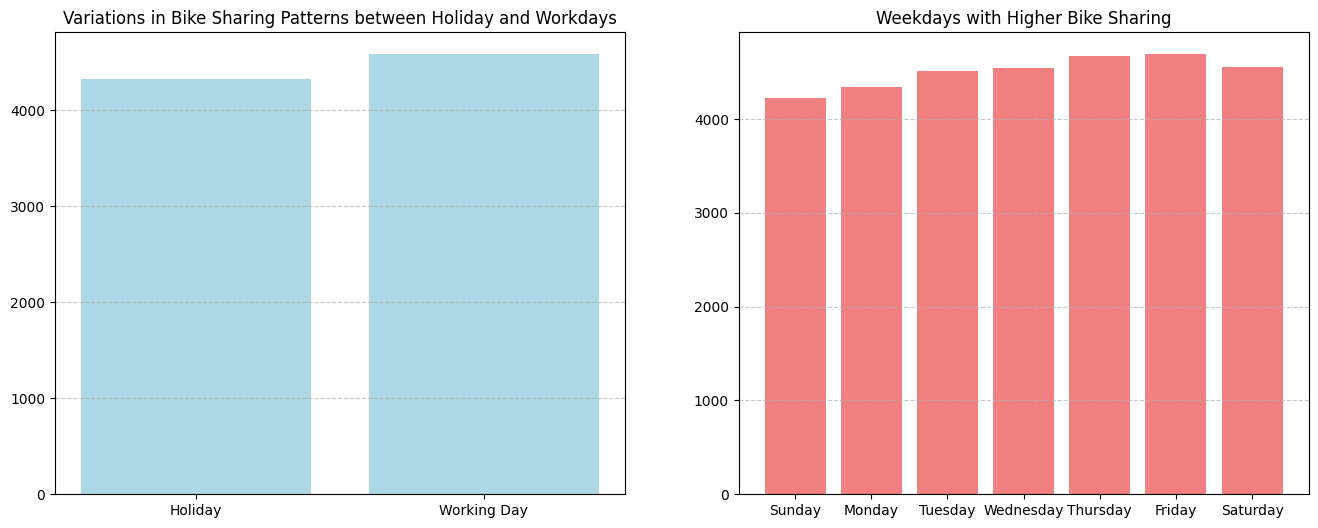

In [33]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan jenis hari (working day atau holiday)
day_type_data = all_df.groupby('workingday_x')['cnt_x'].mean().reset_index()

# Mengatur label hari
day_labels = {0: 'Holiday', 1: 'Working Day'}
day_type_data['workingday_x'] = day_type_data['workingday_x'].map(day_labels)

# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan hari dalam seminggu
weekday_data = all_df.groupby('weekday_x')['cnt_x'].mean().reset_index()

# Mengatur label hari
weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weekday_data['weekday_x'] = weekday_data['weekday_x'].map(weekday_labels)

plt.figure(figsize=(25, 6))

# Subplot 1: Perbedaan Pola Penyewaan Sepeda antara Hari Libur dan Hari Kerja
plt.subplot(131)
plt.bar(day_type_data['workingday_x'], day_type_data['cnt_x'], color='lightblue')
plt.title('Variations in Bike Sharing Patterns between Holiday and Workdays')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Hari-Hari dalam Seminggu dengan Penyewaan Sepeda Lebih Tinggi
plt.subplot(132)
plt.bar(weekday_data['weekday_x'], weekday_data['cnt_x'], color='lightcoral')
plt.title('Weekdays with Higher Bike Sharing')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Conclusion

- Conclution pertanyaan 1
  Berdasarkan visualisasi di atas, kita dapat melihat bahwa ada tren kenaikan pada season fall. Selain itu kita juga dapat melihat adanya tren penurunan pada season winter 
- Conclution pertanyaan 2 
  Berdasarkan visualisasi di atas, kita dapat melihat bahwa cuaca sangat mempengaruhi jumlah penyewaan sepeda, jadi penyewaan sepeda paling sering dilakukan pada saat cuaca clear.
- Conclution pertanyaan 3
  Berdasarkan visualisasi di atas, kita dapat melihat bahwa penyewa sepeda untuk per tahun yang paling banyak di tahun 2012 dan paling sedikit di tahun 2011, sedangkan penyewa sepeda untuk per bulan yang paling banyak di bulan April, Mei, Juni, Juli, Agustus, September dan paling sedikit di bulan januari, februari, maret, oktober, november, dan desember.
- Conclution pertanyaan 4
  Berdasarkan visualisasi di atas, kita dapat melihat bahwa pola penyewa sepeda antara holiday dan workingday terdapat perbedaan.
- Conclution pertanyaan 5
  Berdasarkan visualisasi di atas, kita dapat melihat bahwa pola penyewa sepeda lebih tinggi di hari jumat.

In [35]:
all_df.to_csv("all_data2.csv", index=False)